In [312]:
import pandas as pd
df = pd.read_csv('New HIV infections_New HIV infections - All ages_Population_ All ages.csv')

In [313]:
import re

years = []
for item in df.columns:
    match = re.search(r'\d{4}', item)
    if match:
        if match.group() == '1990':
            years.append(match.group())
        else:
            years.append(' ' + match.group())


['1990', '1990', '1990', '1990', ' 1991', ' 1991', ' 1991', ' 1991', ' 1992', ' 1992', ' 1992', ' 1992', ' 1993', ' 1993', ' 1993', ' 1993', ' 1994', ' 1994', ' 1994', ' 1994', ' 1995', ' 1995', ' 1995', ' 1995', ' 1996', ' 1996', ' 1996', ' 1996', ' 1997', ' 1997', ' 1997', ' 1997', ' 1998', ' 1998', ' 1998', ' 1998', ' 1999', ' 1999', ' 1999', ' 1999', ' 2000', ' 2000', ' 2000', ' 2000', ' 2001', ' 2001', ' 2001', ' 2001', ' 2002', ' 2002', ' 2002', ' 2002', ' 2003', ' 2003', ' 2003', ' 2003', ' 2004', ' 2004', ' 2004', ' 2004', ' 2005', ' 2005', ' 2005', ' 2005', ' 2006', ' 2006', ' 2006', ' 2006', ' 2007', ' 2007', ' 2007', ' 2007', ' 2008', ' 2008', ' 2008', ' 2008', ' 2009', ' 2009', ' 2009', ' 2009', ' 2010', ' 2010', ' 2010', ' 2010', ' 2011', ' 2011', ' 2011', ' 2011', ' 2012', ' 2012', ' 2012', ' 2012', ' 2013', ' 2013', ' 2013', ' 2013', ' 2014', ' 2014', ' 2014', ' 2014', ' 2015', ' 2015', ' 2015', ' 2015', ' 2016', ' 2016', ' 2016', ' 2016', ' 2017', ' 2017', ' 2017', ' 20

In [314]:
def remove_duplicate_strings(list):
    new_list = []
    for string in list:
        if string not in new_list:
            new_list.append(string)
    return new_list

columns = remove_duplicate_strings(years)
columns.append('Country')

In [315]:
clean_df = df[columns].dropna()
clean_df = clean_df.replace({'<':''}, regex=True)


In [316]:
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
    "Congo (Brazzaville)", "Congo (Kinshasa)", "Cote d'Ivoire", "Djibouti",
    "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
    "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
    "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
    "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
    "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]


In [317]:
african_clean_df = clean_df.loc[clean_df['Country'].apply(lambda x: x in african_countries)]

In [318]:
african_clean_df.set_index(['Country'], inplace= True)


In [319]:
transposed_african_clean_df = african_clean_df.transpose()
transposed_african_clean_df.reset_index(inplace=True)




In [320]:
transposed_african_clean_df.rename(columns={'index':'Time'}, inplace=True)


In [321]:
transposed_african_clean_df = transposed_african_clean_df.replace('... ', pd.NA)

# Drop columns with NaN values
transposed_african_clean_df = transposed_african_clean_df.dropna(axis=1)


In [322]:
# transposed_african_clean_df = transposed_african_clean_df[transposed_african_clean_df != '...']
for column in transposed_african_clean_df.columns:
    # transposed_african_clean_df = transposed_african_clean_df[transposed_african_clean_df[column] != '... ']
    transposed_african_clean_df[column] = transposed_african_clean_df[column].str.replace(' ', '').astype(int)



C:\Users\TKHRIESAVINYU\AppData\Local\Temp\ipykernel_32600\4009536397.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of new HIV case in Algeria')

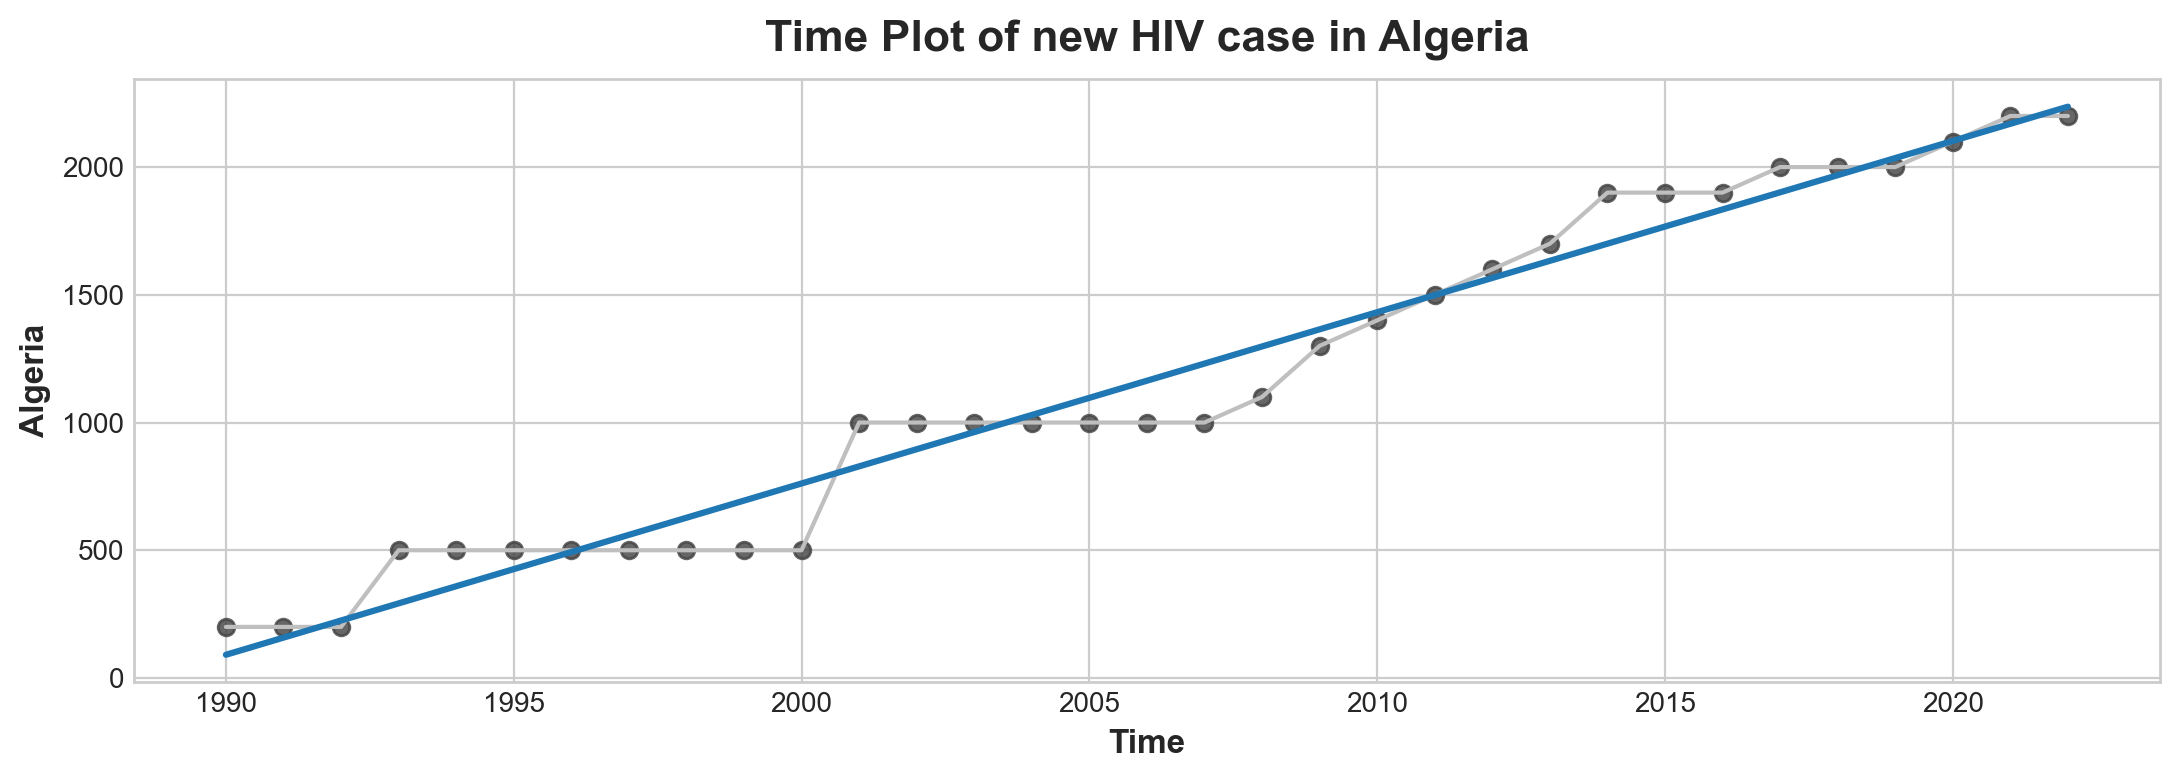

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Algeria', data=transposed_african_clean_df, color='0.75')
ax = sns.regplot(x='Time', y='Algeria', data=transposed_african_clean_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time-Series Plot of new HIV case in Algeria')

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from xgboost import XGBRegressor

In [ ]:
# You'll add fit and predict methods to this minimal class
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method
    
    def fit(self, X_1, X_2, y):
    # YOUR CODE HERE: fit self.model_1
    self.model_1.fit(X_1,y)

    y_fit = pd.DataFrame(
        # YOUR CODE HERE: make predictions with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=y.columns,
    )

    # YOUR CODE HERE: compute residuals
    y_resid = y - y_fit
    y_resid = y_resid.stack().squeeze() # wide to long

    # YOUR CODE HERE: fit self.model_2 on residuals
    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = y.columns
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid


    def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        # YOUR CODE HERE: predict with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=self.y_columns,
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    # YOUR CODE HERE: add self.model_2 predictions to y_pred
    y_pred += self.model_2.predict(X_2)
    
    return y_pred.unstack()  # long to wide


# Add method to class
BoostedHybrid.predict = predict


# Add method to class
BoostedHybrid.fit = fit

In [352]:
transposed_african_clean_df.set_index('Time', inplace=True)


In [389]:
country = "Algeria"
steps = 3

C:\Users\TKHRIESAVINYU\AppData\Local\Temp\ipykernel_32600\3339306790.py:33: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\TKHRIESAVINYU\AppData\Local\Temp\ipykernel_32600\3339306790.py:34: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)


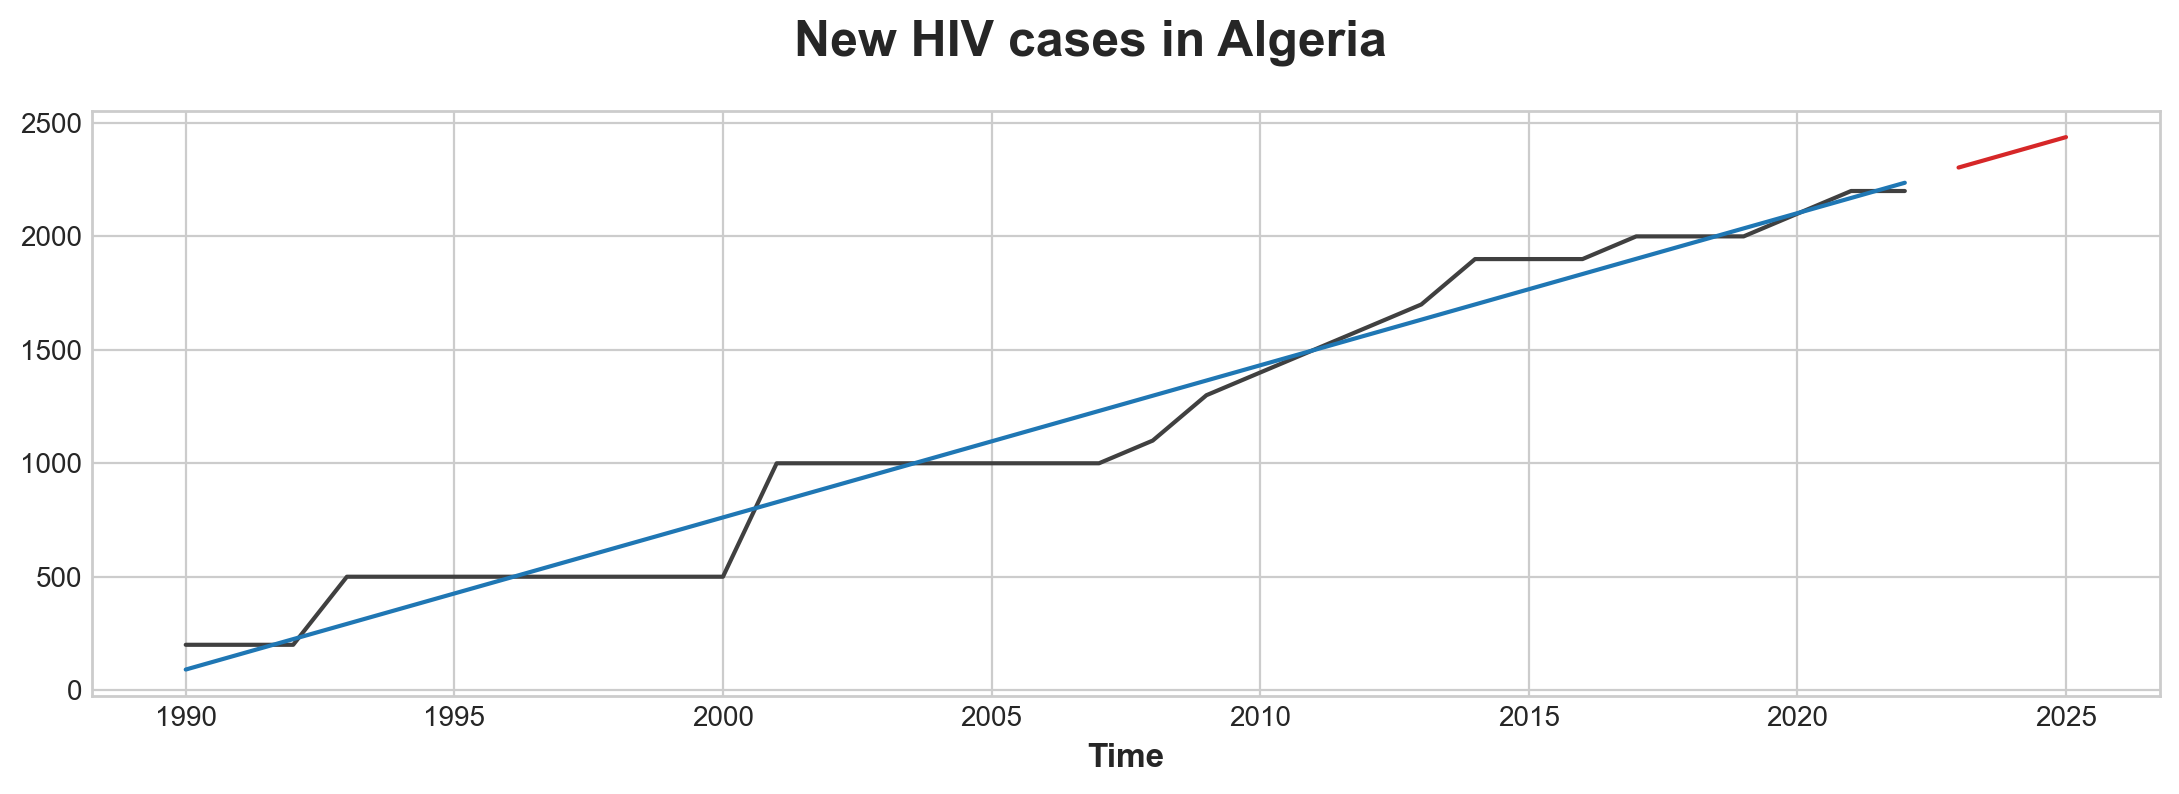

In [390]:
y = pd.DataFrame(transposed_african_clean_df[country]).copy()

# Create trend features
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()  # features for the training data

X_forecast = dp.out_of_sample(steps=steps)


# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X),
    index=y.index,
    columns=y.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_forecast),
    index=X_forecast.index,
    columns=y.columns,
)

# Plot
axs = y.plot(color='0.25', subplots=True, sharex=True)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle(f"New HIV cases in {country}")

In [391]:
y_pred

,Algeria
2023,2303.409091
2024,2370.454545
2025,2437.500000
